In [3]:
import numpy as np
import matplotlib.pyplot as plt
import umap
import os
import pickle
import pandas as pd
from matplotlib.patches import Ellipse
from matplotlib.colors import ListedColormap
from scipy.stats import chi2
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
umap_dimensions = [2]
predefined_seeds = [42, 7, 19, 23, 1, 100, 56, 77, 89, 33, 8, 
                    13, 5, 21, 34, 99, 67, 18, 50, 81, 45, 22, 74, 37, 58, 
                    90, 16, 11, 29, 85]

In [7]:
base_path = "../Embeddings/"
dataset_folders = {
        "Tuffery":"TUFFERY_REF", 
        "Proust": "STYLE_REF/PROUST_REF",
        "Celine": "STYLE_REF/CELINE_REF", 
        "Yourcenar":"STYLE_REF/YOURCENAR_REF",
        "Proust_mistral": "STYLE_GEN/PROUST_MISTRAL_GEN",
        "Celine_mistral": "STYLE_GEN/CELINE_MISTRAL_GEN", 
        "Yourcenar_mistral":"STYLE_GEN/YOURCENAR_MISTRAL_GEN",
        "Proust_gemini": "STYLE_GEN/PROUST_GEMINI_GEN",
        "Celine_gemini": "STYLE_GEN/CELINE_GEMINI_GEN", 
        "Yourcenar_gemini":"STYLE_GEN/YOURCENAR_GEMINI_GEN",
        "Proust_gpt": "STYLE_GEN/PROUST_GPT_GEN",
        "Celine_gpt": "STYLE_GEN/CELINE_GPT_GEN", 
        "Yourcenar_gpt":"STYLE_GEN/YOURCENAR_GPT_GEN",
    }

In [8]:
def load_embeddings_from_pickle(embeddings_dir):
    try:
        with open(embeddings_dir, 'rb') as f:
            embeddings = pickle.load(f)
        return embeddings
    except FileNotFoundError as e:
        print(f"File not found: {embeddings_dir}")
        raise e
    

def apply_kmeans(data, n_clusters=3):
    """
    Apply KMeans clustering to the given data.
    """
    model = KMeans(n_clusters=n_clusters, random_state=0)
    labels = model.fit_predict(data)
    return labels + 1, model

# Plots

In [38]:
model_name = "FacebookAI/xlm-roberta-large"

# Load the embeddings for each class
embeddings_dict, distances_dict = {}, {}
for class_name, folder in dataset_folders.items():
    safe_model_name = model_name.replace('/', '_').replace('\\', '_')
    embeddings_dir = os.path.join(base_path, folder, f"{safe_model_name}_embeddings.pkl")
    embeddings_dict[class_name] = load_embeddings_from_pickle(embeddings_dir)

In [39]:
embeddings_tuffery = embeddings_dict["Tuffery"]
embeddings_proust = embeddings_dict["Proust"]
embeddings_celine = embeddings_dict["Celine"]
embeddings_yourcenar = embeddings_dict["Yourcenar"]
embeddings_proust_gpt = embeddings_dict["Proust_gpt"]
embeddings_celine_gpt = embeddings_dict["Celine_gpt"]
embeddings_yourcenar_gpt = embeddings_dict["Yourcenar_gpt"]
embeddings_proust_mistral = embeddings_dict["Proust_mistral"]
embeddings_celine_mistral = embeddings_dict["Celine_mistral"]
embeddings_yourcenar_mistral = embeddings_dict["Yourcenar_mistral"]
embeddings_proust_gemini = embeddings_dict["Proust_gemini"]
embeddings_celine_gemini = embeddings_dict["Celine_gemini"]
embeddings_yourcenar_gemini = embeddings_dict["Yourcenar_gemini"]

In [20]:
for seed in predefined_seeds:
    reducer = umap.UMAP(n_components=2, random_state=seed, n_jobs=1)
    all_embeddings = np.concatenate((embeddings_tuffery, embeddings_proust, embeddings_celine, embeddings_yourcenar, 
                                        embeddings_proust_gpt, embeddings_celine_gpt, embeddings_yourcenar_gpt, 
                            embeddings_proust_mistral, embeddings_celine_mistral, embeddings_yourcenar_mistral, 
                            embeddings_proust_gemini, embeddings_celine_gemini, embeddings_yourcenar_gemini), axis=0)
    reducer.fit(all_embeddings)

In [40]:
transformed_tuffery = reducer.transform(embeddings_tuffery)
transformed_proust = reducer.transform(embeddings_proust)
transformed_celine = reducer.transform(embeddings_celine)
transformed_yourcenar = reducer.transform(embeddings_yourcenar)
transformed_proust_gpt = reducer.transform(embeddings_proust_gpt)
transformed_celine_gpt = reducer.transform(embeddings_celine_gpt)
transformed_yourcenar_gpt = reducer.transform(embeddings_yourcenar_gpt)
transformed_proust_mistral = reducer.transform(embeddings_proust_mistral)
transformed_celine_mistral = reducer.transform(embeddings_celine_mistral)
transformed_yourcenar_mistral = reducer.transform(embeddings_yourcenar_mistral)
transformed_proust_gemini = reducer.transform(embeddings_proust_gemini)
transformed_celine_gemini = reducer.transform(embeddings_celine_gemini)
transformed_yourcenar_gemini = reducer.transform(embeddings_yourcenar_gemini)

In [41]:
transformed_tuffery[:, [0, 1]] = transformed_tuffery[:, [1, 0]]
transformed_proust[:, [0, 1]] = transformed_proust[:, [1, 0]]
transformed_celine[:, [0, 1]] = transformed_celine[:, [1, 0]]
transformed_yourcenar[:, [0, 1]] = transformed_yourcenar[:, [1, 0]]
transformed_proust_gpt[:, [0, 1]] = transformed_proust_gpt[:, [1, 0]]
transformed_celine_gpt[:, [0, 1]] = transformed_celine_gpt[:, [1, 0]]
transformed_yourcenar_gpt[:, [0, 1]] = transformed_yourcenar_gpt[:, [1, 0]]
transformed_proust_mistral[:, [0, 1]] = transformed_proust_mistral[:, [1, 0]]
transformed_celine_mistral[:, [0, 1]] = transformed_celine_mistral[:, [1, 0]]
transformed_yourcenar_mistral[:, [0, 1]] = transformed_yourcenar_mistral[:, [1, 0]]
transformed_proust_gemini[:, [0, 1]] = transformed_proust_gemini[:, [1, 0]]
transformed_celine_gemini[:, [0, 1]] = transformed_celine_gemini[:, [1, 0]]
transformed_yourcenar_gemini[:, [0, 1]] = transformed_yourcenar_gemini[:, [1, 0]]

In [42]:

my_colors = ["black","grey","lightgrey"]
cmap = ListedColormap(my_colors)

In [43]:
def plot_confidence_ellipse(data, ax, n_std=2.146, edgecolor='black', **kwargs):
    """
    Plots an ellipse representing a confidence region for a 2D Gaussian.
    n_std = 2.146 corresponds to ~90% confidence level for 2D Gaussian.
    """
    mean = np.mean(data, axis=0)
    cov = np.cov(data, rowvar=False)
    
    # Compute the eigenvalues and eigenvectors
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * n_std * np.sqrt(vals)  # scale for confidence ellipse

    ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta,
                      edgecolor=edgecolor, facecolor='none', lw=2, linestyle='--', **kwargs)
    
    return(ax.add_patch(ellipse))

n_std = np.sqrt(chi2.ppf(0.7, df=2)) 

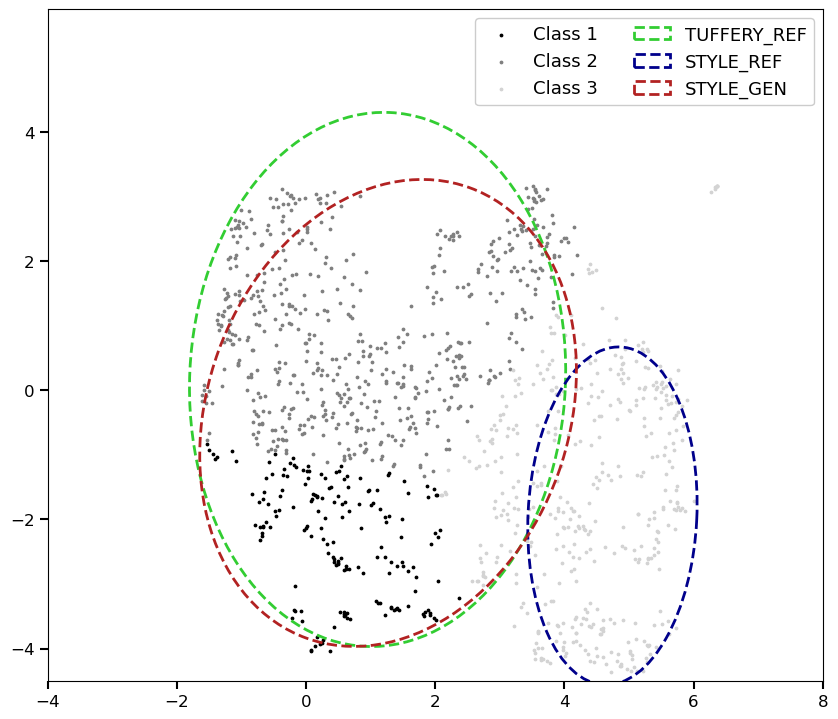

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))

transformed_tuffery_copy = - transformed_tuffery
transformed_proust_copy = - transformed_proust
transformed_celine_copy = - transformed_celine
transformed_yourcenar_copy = - transformed_yourcenar
transformed_proust_gpt_copy = - transformed_proust_gpt
transformed_proust_mistral_copy = - transformed_proust_mistral
transformed_proust_gemini_copy = - transformed_proust_gemini
transformed_celine_gpt_copy = - transformed_celine_gpt
transformed_celine_mistral_copy = - transformed_celine_mistral
transformed_celine_gemini_copy = - transformed_celine_gemini
transformed_yourcenar_gpt_copy = - transformed_yourcenar_gpt
transformed_yourcenar_mistral_copy = - transformed_yourcenar_mistral
transformed_yourcenar_gemini_copy = - transformed_yourcenar_gemini

class_tuffery = transformed_tuffery_copy
class_B1 = np.concatenate((transformed_proust_copy, transformed_celine_copy, transformed_yourcenar_copy))
class_proust_gen = np.concatenate((transformed_proust_gpt_copy, transformed_proust_mistral_copy, transformed_proust_gemini_copy))
class_celine_gen = np.concatenate((transformed_celine_gpt_copy, transformed_celine_mistral_copy, transformed_celine_gemini_copy))    
class_yourcenar_gen = np.concatenate((transformed_yourcenar_gpt_copy, transformed_yourcenar_mistral_copy, transformed_yourcenar_gemini_copy))    
class_A2 = np.concatenate((class_proust_gen, class_celine_gen, class_yourcenar_gen))

data = np.concatenate((class_tuffery, class_B1, class_A2))
labels = np.concatenate(([0]*len(class_tuffery), 
                         [1]*len(class_B1),
                         [2]*len(class_A2),
                         ))
results = np.array(apply_kmeans(data, n_clusters=3)[0])

# Create masks and filtered arrays
data_0 = data[results == 3]
data_1 = data[results == 1]
data_2 = data[results == 2]

ax.scatter(data_0[:,0], data_0[:,1], c="black", s=3, label="Class 1")
ax.scatter(data_1[:,0], data_1[:,1], c="grey", s=3, label="Class 2")
ax.scatter(data_2[:,0], data_2[:,1], c="lightgrey", s=3, label="Class 3")

# Draw ellipses
plot_confidence_ellipse(transformed_tuffery_copy, ax, n_std=n_std, edgecolor='limegreen', label='TUFFERY_REF')

plot_confidence_ellipse(np.concatenate((transformed_proust_copy,transformed_yourcenar_copy, transformed_celine_copy)), ax, n_std=n_std, edgecolor='darkblue', label='STYLE_REF')

plot_confidence_ellipse(np.concatenate((transformed_proust_gpt_copy, transformed_proust_mistral_copy, transformed_proust_gemini_copy, 
                                        transformed_yourcenar_gpt_copy, transformed_yourcenar_mistral_copy, transformed_yourcenar_gemini_copy, 
                                        transformed_celine_mistral_copy, transformed_celine_gpt_copy, transformed_celine_gemini_copy)), 
                        ax, n_std=n_std, edgecolor='firebrick', label='STYLE_GEN')

ax.set_aspect('equal')
ax.set_ylim(-4.5, 5.9)
ax.set_xlim(-4, 8)
ax.legend(loc='upper right',
          ncol=2, 
          framealpha=1, 
          fontsize=13)

ax.tick_params(axis='both', 
               which='major', 
               labelsize=12, 
               length=6, 
               width=1.5)

plt.show()

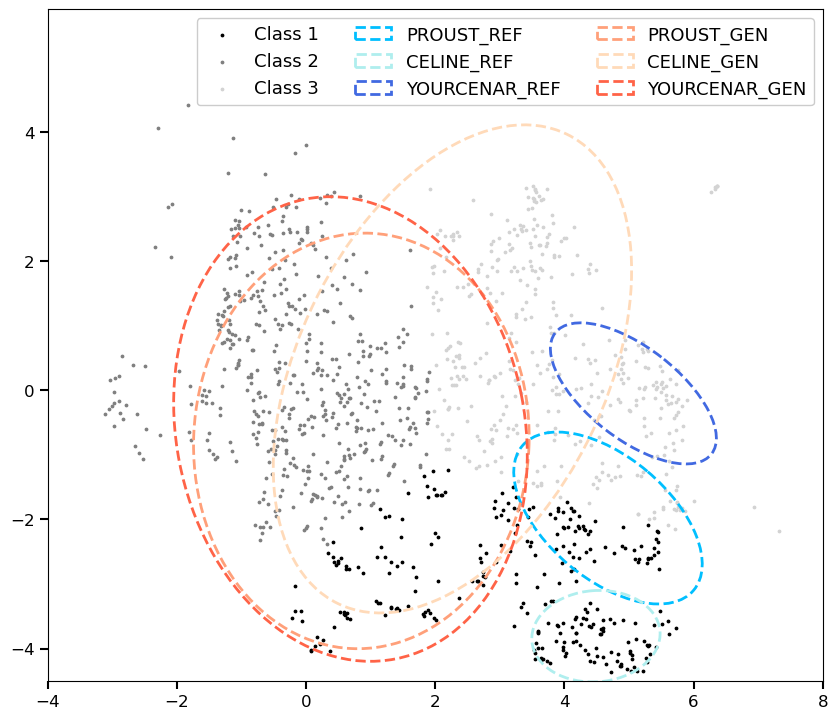

In [45]:
n_std = np.sqrt(chi2.ppf(0.7, df=2)) 

fig, ax = plt.subplots(figsize=(10, 10))

class_tuffery = transformed_tuffery
class_tuffery[:, [0, 1]] = class_tuffery[:, [1, 0]]
class_tuffery[:, 1] = - class_tuffery[:, 1] 

transformed_proust_copy = - transformed_proust
transformed_celine_copy = - transformed_celine
transformed_yourcenar_copy = - transformed_yourcenar
class_B1 = np.concatenate((transformed_proust_copy, transformed_celine_copy, transformed_yourcenar_copy))


transformed_proust_gpt_copy = - transformed_proust_gpt
transformed_proust_mistral_copy = - transformed_proust_mistral
transformed_proust_gemini_copy = - transformed_proust_gemini
class_proust_gen = np.concatenate((transformed_proust_gpt_copy, transformed_proust_mistral_copy, transformed_proust_gemini_copy))

transformed_celine_gpt_copy = - transformed_celine_gpt
transformed_celine_mistral_copy = - transformed_celine_mistral
transformed_celine_gemini_copy = - transformed_celine_gemini
class_celine_gen = np.concatenate((transformed_celine_gpt_copy, transformed_celine_mistral_copy, transformed_celine_gemini_copy))    

transformed_yourcenar_gpt_copy = - transformed_yourcenar_gpt
transformed_yourcenar_mistral_copy = - transformed_yourcenar_mistral
transformed_yourcenar_gemini_copy = - transformed_yourcenar_gemini
class_yourcenar_gen = np.concatenate((transformed_yourcenar_gpt_copy, transformed_yourcenar_mistral_copy, transformed_yourcenar_gemini_copy)) 

class_A2 = np.concatenate((class_proust_gen, class_celine_gen, class_yourcenar_gen))

data = np.concatenate((class_tuffery, class_B1, class_A2))
labels = np.concatenate(([0]*len(class_tuffery), 
                         [1]*len(class_B1),
                         [2]*len(class_A2),
                         ))
results = np.array(apply_kmeans(data, n_clusters=3)[0])

# Create masks and filtered arrays
data_0 = data[results == 3]
data_1 = data[results == 1]
data_2 = data[results == 2]

lines = []

lines.append(ax.scatter(data_0[:,0], data_0[:,1], c="black", s=3, label="Class 1"))
lines.append(ax.scatter(data_1[:,0], data_1[:,1], c="grey", s=3, label="Class 2"))
lines.append(ax.scatter(data_2[:,0], data_2[:,1], c="lightgrey", s=3, label="Class 3"))

# # Draw ellipses"paleturquoise", "deepskyblue", "royalblue"
# lines.append(plot_confidence_ellipse(transformed_tuffery, ax, n_std=n_std, edgecolor='darkblue', label='TUFFERY_REF'))
lines.append(plot_confidence_ellipse(transformed_proust_copy, ax, n_std=n_std, edgecolor='deepskyblue', label ='PROUST_REF'))
lines.append(plot_confidence_ellipse(transformed_celine_copy, ax, n_std=n_std, edgecolor='paleturquoise', label ='CELINE_REF'))
lines.append(plot_confidence_ellipse(transformed_yourcenar_copy, ax, n_std=n_std, edgecolor='royalblue', label ='YOURCENAR_REF'))

lines.append(plot_confidence_ellipse(np.concatenate((transformed_proust_gpt_copy, transformed_proust_mistral_copy, transformed_proust_gemini_copy)), ax, n_std=n_std, edgecolor='lightsalmon', label ='PROUST_GEN'))
lines.append(plot_confidence_ellipse(np.concatenate((transformed_celine_mistral_copy, transformed_celine_gpt_copy, transformed_celine_gemini_copy)), ax, n_std=n_std, edgecolor='peachpuff', label ='CELINE_GEN'))
lines.append(plot_confidence_ellipse(np.concatenate((transformed_yourcenar_gpt_copy, transformed_yourcenar_mistral_copy, transformed_yourcenar_gemini_copy)), ax, n_std=n_std, edgecolor='tomato', label ='YOURCENAR_GEN'))

ax.set_aspect('equal')
ax.set_ylim(-4.5, 5.9)
ax.set_xlim(-4, 8)
ax.legend(
          loc='upper right', 
          ncol=3, 
          framealpha=1, 
          fontsize=13)

ax.tick_params(axis='both', 
               which='major', 
               labelsize=12, 
               length=6, 
               width=1.5)

plt.show()

# Purity results

In [55]:
def purity_score(y_true, y_pred):
    """
    Calculate the purity score for the clustering results.
    """
    contingency_matrix = pd.crosstab(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix.values, axis=0)) / np.sum(contingency_matrix.values)


def assign_group_labels(embeddings_dict):
    """
    Assign group labels based on the embeddings dictionary.
    """
    labels = []
    for group, embeddings in embeddings_dict.items():
        labels.extend([group] * len(embeddings))
    return np.array(labels)

def cluster_and_evaluate(data, labels, method_name, dimensionality, model_name, results, n_clusters):
    """
    Perform clustering and evaluation, then save the results.
    """
    y_pred, _ = apply_kmeans(data, n_clusters=n_clusters)
    purity = purity_score(labels, y_pred)
    results.append((model_name, method_name, dimensionality, purity, n_clusters))

In [56]:
model_configs = [
    {"model_name": "mistral-embed"},
    {"model_name": "text-embedding-3-small"},
    {"model_name": "paraphrase-multilingual-mpnet-base-v2"},
    {"model_name": "intfloat/e5-base-v2"},
    {"model_name": "all-roberta-large-v1"},
    {"model_name": "dangvantuan/sentence-camembert-base"},
    {"model_name": "OrdalieTech/Solon-embeddings-large-0.1"},
    {"model_name": "FacebookAI/xlm-roberta-large"},
    {"model_name": "distilbert/distilbert-base-uncased"},
    {"model_name": "sentence-transformers/all-MiniLM-L12-v2"},
    {"model_name": "intfloat/multilingual-e5-large"},
    {"model_name": "models/text-embedding-004"}, 
    {"model_name": "voyage-2"}, 
]

In [ ]:
all_results = []

for nb_clusters in [2, 4]:
    for config in model_configs:
        model_name = config['model_name']
        
        # for triplet in triplets:
        # Load the embeddings for each class
        embeddings_dict = {}
        
        for author in ['Proust', "Celine", "Yourcenar"]:
            for gen_ai in ["gpt", "mistral", "gemini"]:

                class_name = f"{author}_{gen_ai}"
                tuffery_folder = f"../Embeddings/TUFFERY_REF"
                # style_ref_folder = f"../Embeddings/STYLE_REF/{author.upper()}_REF"
                style_gen_folder = f"../Embeddings/STYLE_GEN/{author.upper()}_{gen_ai.upper()}_GEN"

                # for class_name, folder in :
                safe_model_name = model_name.replace('/', '_').replace('\\', '_')
                embeddings_dir_tuffery = os.path.join(base_path, tuffery_folder, f"{safe_model_name}_embeddings.pkl")
                # embeddings_dir_style_ref = os.path.join(base_path, style_ref_folder, f"{safe_model_name}_embeddings.pkl")
                embeddings_dir_style_gen = os.path.join(base_path, style_gen_folder, f"{safe_model_name}_embeddings.pkl")

                # embeddings_dir = os.path.join(base_path, folder, f"{safe_model_name}.pkl")
                embeddings_dict["tuffery"] = load_embeddings_from_pickle(embeddings_dir_tuffery)
                # embeddings_dict["style_ref"] = load_embeddings_from_pickle(embeddings_dir_style_ref)
                embeddings_dict["style_gen"] = load_embeddings_from_pickle(embeddings_dir_style_gen)
        
                # Combine embeddings
                combined_embeddings = np.concatenate([embeddings_dict[key] for key in embeddings_dict.keys()])
                
                # Assign group labels
                group_labels = assign_group_labels(embeddings_dict)

                # Initialize results storage for current model
                results = []

                # Scale the embeddings
                scaler = StandardScaler()
                embeddings_scaled = scaler.fit_transform(combined_embeddings)

                # FullD
                cluster_and_evaluate(embeddings_scaled, group_labels, 'FullD', 'FullD', model_name, results, n_clusters=2)

                for dim in [2, 3, 10]:
                    umpa_reducer = umap.UMAP(n_components=dim, random_state=56, n_jobs=1)
                    embeddings_umap = umpa_reducer.fit_transform(embeddings_scaled)
                    cluster_and_evaluate(embeddings_umap, group_labels, f'{dim}D UMAP', dim, model_name, results, n_clusters=2)    
                    
                # Append current model results to all results
                all_results.extend(results)


In [ ]:
# Create a DataFrame to store all results
_all_results_df = pd.DataFrame(all_results, columns=['Model', 'Method', 'Dimensionality', 'Purity', 'Nb clusters'])

all_results_df = _all_results_df.groupby(["Model", "Method", "Dimensionality", 'Nb clusters'], as_index=False)["Purity"].mean()

all_results_df

,Model,Method,Dimensionality,Purity
0,FacebookAI/xlm-roberta-large,10D UMAP,10,0.784722
1,FacebookAI/xlm-roberta-large,2D UMAP,2,0.826389
2,FacebookAI/xlm-roberta-large,3D UMAP,3,0.779707
3,FacebookAI/xlm-roberta-large,FullD,FullD,0.765432
4,OrdalieTech/Solon-embeddings-large-0.1,10D UMAP,10,0.677469
5,OrdalieTech/Solon-embeddings-large-0.1,2D UMAP,2,0.683256
6,OrdalieTech/Solon-embeddings-large-0.1,3D UMAP,3,0.668981
7,OrdalieTech/Solon-embeddings-large-0.1,FullD,FullD,0.652392
8,all-roberta-large-v1,10D UMAP,10,0.639275
9,all-roberta-large-v1,2D UMAP,2,0.626929


In [50]:
# Calculate and display the median global score per method
median_scores_per_model_method = all_results_df.groupby(['Method'])['Purity'].median().reset_index()
median_scores_per_model_method.columns = ['Method', 'Median Purity']
# Print the median results
print("Median Purity per Method:")
print(median_scores_per_model_method.sort_values(by="Median Purity"))

Median Purity per Method:
     Method  Median Purity
3     FullD       0.653935
0  10D UMAP       0.712963
2   3D UMAP       0.714506
1   2D UMAP       0.722608


In [51]:
# Calculate and display the mean global score per method
mean_scores_per_model_method = all_results_df.groupby(['Method'])['Purity'].mean().reset_index()
mean_scores_per_model_method.columns = ['Method', 'Mean Purity']
# Print the median results
print("Mean Purity per Method:")
print(mean_scores_per_model_method.sort_values(by="Mean Purity"))

Mean Purity per Method:
     Method  Mean Purity
3     FullD     0.657496
2   3D UMAP     0.710114
0  10D UMAP     0.714892
1   2D UMAP     0.721540
